In [1]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud

In [2]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
#!pip install ipynb 
from ipynb.fs.full.preprocessor_class import Preprocessor

In [24]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(45000, 1)

In [25]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_data_train = pd.DataFrame(columns=['text'])
preprocessed_data_test = pd.DataFrame(columns=['text'])

preprocessed_data_train['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

preprocessed_data_test['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [26]:
preprocessed_data_train

,text
0,"[levi, changed, fit, without, telling, anyone,..."
1,"[fitted, small, niece, fix]"
2,"[best, quality, tweezer, able, grab, smallest,..."
3,"[finally, received, reply, invicta, customer, ..."
4,"[perfect, fit, easy, care, dress, smashing, fi..."
...,...
44995,"[love, style, came, hole, crotch, stitching]"
44996,"[turtleneck, fit, perfect, good, feel, purchas..."
44997,"[ring, look, great, husband, hand, look, like,..."
44998,"[odd, shoe, arch, inside, flyer, say, take, ti..."


In [27]:
preprocessed_data_test

,text
0,"[poorly, made, shrink, fit, well]"
1,"[playing, santa, year, authentic, high, qualit..."
2,"[bought, two, one, better, shipping, schedule,..."
3,"[came, box, scratch, one, lense, know, inexpen..."
4,"[okay, kind, hard, explain, really, liked, ski..."
...,...
5995,"[cute, versatile, great, fit, comfortable, hig..."
5996,"[really, like, fit, flattering, tall, people, ..."
5997,"[attractive, solidly, constructed, little, nar..."
5998,"[napoleon, cameo, appearance, theatre, product..."


In [28]:
preprocessed_data_test['text'] = preprocessed_data_test['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_test

,text
0,poorly made shrink fit well
1,playing santa year authentic high quality sant...
2,bought two one better shipping schedule second...
3,came box scratch one lense know inexpensive un...
4,okay kind hard explain really liked skirt know...
...,...
5995,cute versatile great fit comfortable high heel...
5996,really like fit flattering tall people large m...
5997,attractive solidly constructed little narrow t...
5998,napoleon cameo appearance theatre production o...


In [29]:
preprocessed_data_train['text'] = preprocessed_data_train['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_train

,text
0,levi changed fit without telling anyone change...
1,fitted small niece fix
2,best quality tweezer able grab smallest splint...
3,finally received reply invicta customer servic...
4,perfect fit easy care dress smashing find wipe...
...,...
44995,love style came hole crotch stitching
44996,turtleneck fit perfect good feel purchasing
44997,ring look great husband hand look like quality...
44998,odd shoe arch inside flyer say take time get u...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_data_train['text']) 
test_tfidf = tfidf_vectorizer.transform(preprocessed_data_test['text']) 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for vecini in [3,4,5,6,7,8,9]:
    neigh = KNeighborsClassifier(n_neighbors=vecini, weights="distance")
    neigh.fit(train_tfidf, train_labels['label'])
    predictii = neigh.predict(test_tfidf)
    acuratete = metrics.accuracy_score(test_labels['label'], predictii)
    print("KNN accuracy with", vecini, "neighbors and weights distance =", acuratete)
    
    neigh = KNeighborsClassifier(n_neighbors=vecini)
    neigh.fit(train_tfidf, train_labels['label'])
    predictii = neigh.predict(test_tfidf)
    acuratete = metrics.accuracy_score(test_labels['label'], predictii)
    print("KNN accuracy with", vecini, "neighbors and weights uniform =", acuratete)
    
    print("\n")

KNN accuracy with 3 neighbors and weights distance = 0.423
KNN accuracy with 3 neighbors and weights uniform = 0.419


KNN accuracy with 4 neighbors and weights distance = 0.425
KNN accuracy with 4 neighbors and weights uniform = 0.4265


KNN accuracy with 5 neighbors and weights distance = 0.42633333333333334
KNN accuracy with 5 neighbors and weights uniform = 0.41


KNN accuracy with 6 neighbors and weights distance = 0.4265
KNN accuracy with 6 neighbors and weights uniform = 0.4106666666666667


KNN accuracy with 7 neighbors and weights distance = 0.41433333333333333
KNN accuracy with 7 neighbors and weights uniform = 0.4085


KNN accuracy with 8 neighbors and weights distance = 0.4096666666666667
KNN accuracy with 8 neighbors and weights uniform = 0.3995


KNN accuracy with 9 neighbors and weights distance = 0.412
KNN accuracy with 9 neighbors and weights uniform = 0.3998333333333333




In [55]:
neigh = KNeighborsClassifier(n_neighbors=5, weights="distance")
neigh.fit(train_tfidf, train_labels['label'])
predictii = neigh.predict(test_tfidf)

In [56]:
from sklearn.metrics import classification_report

print(classification_report(test_labels['label'], predictii))

              precision    recall  f1-score   support

    negative       0.37      0.85      0.52      2000
     neutral       0.48      0.15      0.23      2000
    positive       0.70      0.28      0.40      2000

    accuracy                           0.43      6000
   macro avg       0.52      0.43      0.38      6000
weighted avg       0.52      0.43      0.38      6000



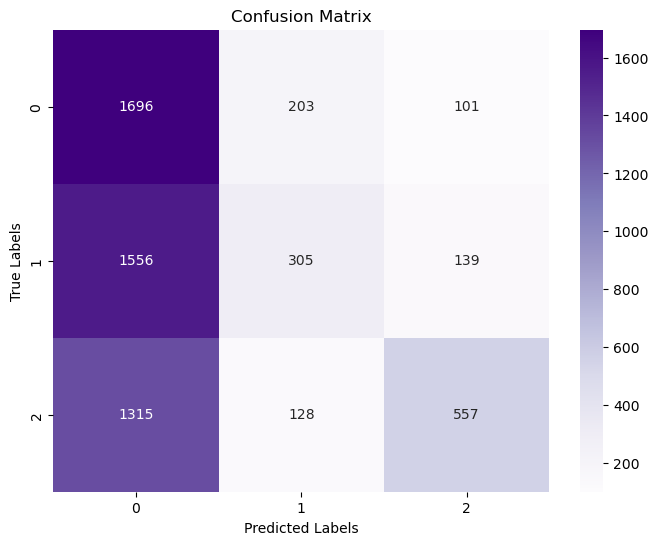

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels['label'], predictii)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()